#                <div align="center">Devoir de Techniques de visualisation des données


##                     <div align="center">MOISE EHIMIGAYE SENGHOR

## <div align="center">*UE : Visualisation de données*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import sweetviz as sv
import datetime
import calendar
import plotly.express as px
from math import *
from matplotlib.ticker import FuncFormatter
from sklearn.datasets import load_iris
from matplotlib.patches import Patch  
from matplotlib.lines import Line2D  
import matplotlib.colors as mcolors 
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import LogLocator
from matplotlib import gridspec
import warnings
warnings.filterwarnings("ignore")

# Exercices d’application :

## Exercice 1 :


### Analysons et explorons les données :

In [2]:
#Importons les données :
these = pd.read_csv("PhD_v3.csv", sep = ',', low_memory=False , encoding='utf-8')

In [3]:
these.head()

Unnamed: 0               Auteur Identifiant auteur  \
0           0       Saeed Al marri                NaN   
1           1    Andrea Ramazzotti          174423705   
2           2  OLIVIER BODENREIDER                NaN   
3           3       Emmanuel Porte                NaN   
4           4     Arthur Devriendt                NaN   

                                               Titre  \
0  Le credit documentaire et l'onopposabilite des...   
1  Application de la PGD a la resolution de probl...   
2  Conception d'un outil informatique d'etude des...   
3  Socio-histoire des politiques publiques en mat...   
4  LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...   

                           Directeur de these  \
0                         Philippe Delebecque   
1  Jean-Claude Grandidier,Marianne Beringhier   
2                             Francois Kohler   
3                               Gilles Pollet   
4                               Gabriel Dupuy   

              Directeur de these (nom prenom) Identifiant directeur  \
0                         Delebecque Philippe              29561248   
1  Grandidier Jean-Claude,Beringhier Marianne           715,441,511   
2                             Kohler Francois              57030758   
3                               Pollet Gilles                    na   
4                               Dupuy Gabriel                    na   

                         Etablissement de soutenance  \
0                                            Paris 1   
1  Chasseneuil-du-Poitou, Ecole nationale superie...   
2                                            Nancy 1   
3                                             Lyon 2   
4                                            Paris 1   

  Identifiant etablissement  \
0                  27361802   
1                  28024400   
2                       NaN   
3                 02640334X   
4                  27361802   

                                          Discipline  ...    Year  \
0                                        Driot prive  ...     NaN   
1  Mecanique des solides, des materiaux, des stru...  ...     NaN   
2                                           Medecine  ...  1993.0   
3                                  Science politique  ...     NaN   
4                                         Geographie  ...     NaN   

  Langue de la these Identifiant de la these  Accessible en ligne  \
0                 na                  s69480                  non   
1                 na                  s98826                  non   
2                 fr            1993NAN19006                  non   
3                 na                  s88867                  non   
4                 na                  s89663                  non   

  Publication dans theses.fr Mise a jour dans theses.fr  \
0                   26-01-12                   26-01-12   
1                   22-11-13                   22-11-13   
2                   24-05-13                   17-11-12   
3                   12-07-13                   12-01-16   
4                   13-07-13                   12-07-13   

              Discipline_prÃ©di   Genre  \
0    Droit et Science Politique    male   
1  Materiaux, Milieux et Chimie  female   
2                      Medecine    male   
3    Droit et Science Politique    male   
4                           SHS    male   

                                   etablissement_rec Langue_rec  
0             Université Paris 1 - Panthéon Sorbonne        NaN  
1  École nationale supérieure de mécanique et d'a...        NaN  
2                             Université de Lorraine   Français  
3                        Université Lumière - Lyon 2        NaN  
4             Université Paris 1 - Panthéon Sorbonne        NaN  

[5 rows x 23 columns]

In [4]:
these.shape

(448047, 23)

In [5]:
rapport = sv.analyze(these)
rapport.show_html('rapport_these.html')

                                             |          | [  0%]   00:00 -> (? left)

Report rapport_these.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
these.info() # un petit recap des differentes variables de notre jeu de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                448047 non-null  int64  
 1   Auteur                                    448047 non-null  object 
 2   Identifiant auteur                        317700 non-null  object 
 3   Titre                                     448040 non-null  object 
 4   Directeur de these                        448034 non-null  object 
 5   Directeur de these (nom prenom)           448034 non-null  object 
 6   Identifiant directeur                     448047 non-null  object 
 7   Etablissement de soutenance               448046 non-null  object 
 8   Identifiant etablissement                 430965 non-null  object 
 9   Discipline                                448047 non-null  object 
 10  Statut              

In [7]:
these = these.set_index('Unnamed: 0')#transformons cette variable en index

- Comme nous avons dans l'exercice une période de réference à utiliser, nous allons creer le dataframe intermediaire à utiliser dans l'exercice.


In [8]:
these84_18 = these[(these.Year > 1984) & (these.Year<2019)]


- Nous sommes interpellé sur deux variables la varibale année et la variable Discipline_prÃ©di , nous allons donc travailler sur ces deux variables .

In [9]:
these84_18.rename(columns={'Discipline_prÃ©di': 'Discipline_agreges'}, inplace=True)
these84_18['Discipline_agreges'] = these84_18['Discipline_agreges'].str.replace('Ã©', 'e', regex=False)

In [10]:
these84_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379157 entries, 2 to 448031
Data columns (total 22 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    379157 non-null  object 
 1   Identifiant auteur                        309328 non-null  object 
 2   Titre                                     379156 non-null  object 
 3   Directeur de these                        379145 non-null  object 
 4   Directeur de these (nom prenom)           379145 non-null  object 
 5   Identifiant directeur                     379157 non-null  object 
 6   Etablissement de soutenance               379156 non-null  object 
 7   Identifiant etablissement                 362083 non-null  object 
 8   Discipline                                379157 non-null  object 
 9   Statut                                    379157 non-null  object 
 10  Date de premiere inscript

In [11]:
# extrayons les données dont nous avons besoin :
these_exo= these84_18[[ 'Date de soutenance', 'Discipline_agreges']]

In [12]:
these_exo= these_exo.reset_index(drop=True)


In [13]:
these_exo["Date"] =  pd.to_datetime(these_exo['Date de soutenance'])#changeons le format de la colonne date de soutenance dans une nouvelle colonne date

In [14]:
these_exo["Date"].head()#verification

0   1993-01-01
1   2008-11-24
2   2005-01-07
3   2009-08-12
4   2013-10-01
Name: Date, dtype: datetime64[ns]

In [15]:
these_exo['Année']= these_exo["Date"].dt.year

In [16]:
these_exo.head()

Date de soutenance          Discipline_agreges       Date  Année
0           01-01-93                    Medecine 1993-01-01   1993
1           24-11-08  Droit et Science Politique 2008-11-24   2008
2           01-07-05  Droit et Science Politique 2005-01-07   2005
3           08-12-09  Droit et Science Politique 2009-08-12   2009
4           10-01-13                    Biologie 2013-10-01   2013

In [17]:
these_exo= these_exo[[ 'Date', 'Année', 'Discipline_agreges']]# faisons les extractions nécessaires
these_exo.head()

Date  Année          Discipline_agreges
0 1993-01-01   1993                    Medecine
1 2008-11-24   2008  Droit et Science Politique
2 2005-01-07   2005  Droit et Science Politique
3 2009-08-12   2009  Droit et Science Politique
4 2013-10-01   2013                    Biologie

In [18]:
these_exo['Discipline_agreges'].unique()

array(['Medecine', 'Droit et Science Politique', 'Biologie', 'SHS',
       'Langues et Litteratures', 'Psychologie', 'Economie Gestion',
       'Informatique', 'Materiaux, Milieux et Chimie', 'Poubelle',
       "Sciences de l'education", "Science de l'ingenieur",
       'Mathematiques', 'Science de la Terre',
       'Mathematiques et Informatique'], dtype=object)

- Travaillons sur la discipline Poubelle :

In [19]:
g = these84_18[these84_18['Discipline_agreges']== 'Poubelle' ]
g['Discipline'].unique()# toutes les matieres correspondent aux STAPS

array(['Staps', 'Sciences du sport (staps)', 'Doctorat staps (ed 536)',
       'Staps : les fondements neurobiologiques, physiologiques et psychosociologiques des habiletes sportives',
       'Science', 'Interdisciplinaire', 'Doctorat STAPS',
       'STAPS. Sciences sociales', 'Staps - shs',
       'STAPS mention Sociologie',
       'Sociologie. Sciences et techniques des activites physiques et sportives (STAPS)',
       'Sciences et techniques des activites physiques et sportives (STAPS)',
       'STAPS, Readaptation, Sport - Sante', 'Sport',
       'STAPS - Option sociologie', 'Doctorat en psychologie et en STAPS',
       'Biologie - Sante. STAPS, Readaptation, Sport - Sante',
       'Didactique des disciplines.Activites physiques et sportives',
       'Developpement',
       'Science technique des activites physique et sportive (STAPS)',
       'Epistemologie', 'Biologie, Sante et Sciences. STAPS',
       'Performance motrice, adaptation, sport',
       'Sciences et Techniques des A

In [20]:
#Changeons le nom des variables et des items à corriger pour une meilleure compréhension :
these_exo['Discipline_agreges'] = these_exo['Discipline_agreges'].replace('Poubelle', 'Sciences et Techniques des Activités Physiques et Sportives')#STAPS
these_exo['Discipline_agreges'] = these_exo['Discipline_agreges'].replace('SHS', 'Sciences Humaines et Sociales')

these_exo.rename(columns={'Discipline_agreges': 'Discipline'}, inplace=True)

these_exo.head()

Date  Année                  Discipline
0 1993-01-01   1993                    Medecine
1 2008-11-24   2008  Droit et Science Politique
2 2005-01-07   2005  Droit et Science Politique
3 2009-08-12   2009  Droit et Science Politique
4 2013-10-01   2013                    Biologie

In [21]:
print(these_exo.head())

        Date  Année                  Discipline
0 1993-01-01   1993                    Medecine
1 2008-11-24   2008  Droit et Science Politique
2 2005-01-07   2005  Droit et Science Politique
3 2009-08-12   2009  Droit et Science Politique
4 2013-10-01   2013                    Biologie


In [22]:
sout_disc_annee = these_exo.groupby(['Année', 'Discipline']).size().reset_index(name='Nombre de Soutenances')
sout_disc_annee.head() #extraction du nombre de soutenances par discipline et par année       

Année                  Discipline  Nombre de Soutenances
0   1985                    Biologie                    695
1   1985  Droit et Science Politique                    168
2   1985            Economie Gestion                    220
3   1985                Informatique                     45
4   1985     Langues et Litteratures                    268

In [23]:
sout_disc_annee1 = sout_disc_annee.pivot(index='Année', columns='Discipline', values='Nombre de Soutenances')
sout_disc_annee1.head() # Pour pouvoir faire des graphiques à aires il nous faut faire un tableau croisé afin d'avoir un dataframe à utiliser pour le reste de l'exercie 

Discipline  Biologie  Droit et Science Politique  Economie Gestion  \
Année                                                                
1985           695.0                       168.0             220.0   
1986           967.0                       400.0             390.0   
1987          1716.0                       413.0             413.0   
1988          1815.0                       374.0             332.0   
1989          1649.0                       378.0             281.0   

Discipline  Informatique  Langues et Litteratures  \
Année                                               
1985                45.0                    268.0   
1986                69.0                    415.0   
1987               101.0                    646.0   
1988               121.0                    457.0   
1989               144.0                    415.0   

Discipline  Materiaux, Milieux et Chimie  Mathematiques  \
Année                                                     
1985                               331.0          120.0   
1986                               635.0          331.0   
1987                              1359.0          766.0   
1988                              1233.0          610.0   
1989                              1405.0          723.0   

Discipline  Mathematiques et Informatique  Medecine  Psychologie  \
Année                                                              
1985                                  2.0     434.0         94.0   
1986                                  1.0     364.0        239.0   
1987                                  8.0     225.0        726.0   
1988                                 12.0    3736.0        688.0   
1989                                 10.0    3926.0        647.0   

Discipline  Science de l'ingenieur  Science de la Terre  \
Année                                                     
1985                         136.0                109.0   
1986                         244.0                243.0   
1987                         367.0                626.0   
1988                         340.0                453.0   
1989                         399.0                415.0   

Discipline  Sciences Humaines et Sociales  Sciences de l'education  \
Année                                                                
1985                                380.0                      5.0   
1986                                863.0                      1.0   
1987                               1069.0                      3.0   
1988                                868.0                      6.0   
1989                                701.0                      6.0   

Discipline  Sciences et Techniques des Activités Physiques et Sportives  
Année                                                                    
1985                                                      NaN            
1986                                                      NaN            
1987                                                      1.0            
1988                                                      NaN            
1989                                                      3.0

Creons une palette de couleurs ajustée pour refléter les relations entre les matières, en tenant compte des matières similaires ou proches, tout en attribuant des couleurs distinctes aux groupes similaires :

- Sciences naturelles et exactes : Biologie, Matériaux, Milieux et Chimie, Médecine, Mathématiques, Mathématiques et Informatique, Science de la Terre, Science de l'ingénieur.
- Sciences humaines et sociales : Droit et Science Politique, Sciences Humaines et Sociales, Langues et Littératures, Psychologie, Sciences de l'éducation.
- Sciences économiques et de gestion : Economie Gestion.
- Technologies et informatique : Informatique, Mathematiques et Informatique.
- Sports et activités physiques : Sciences et Techniques des Activités Physiques et Sportives.

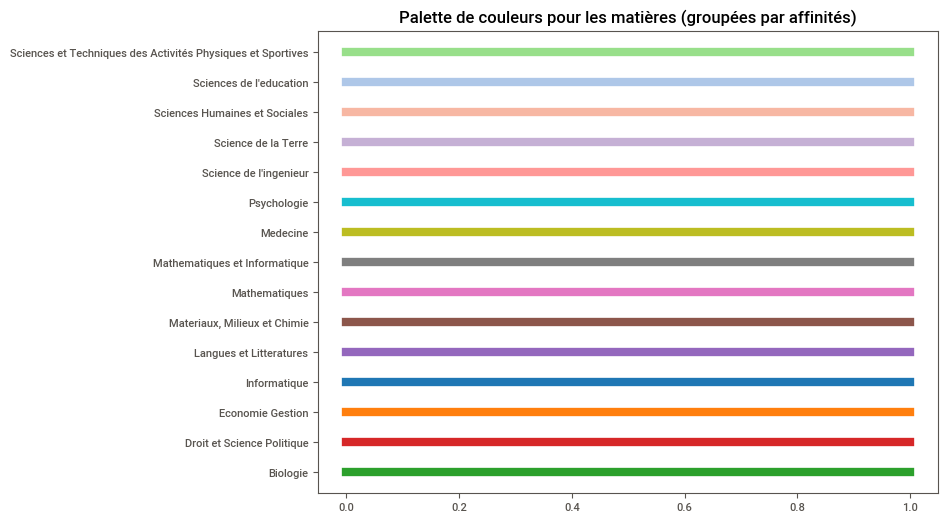

In [24]:
# Nous avons créer ce dictionnaire des matières et couleurs associées car les couleurs sont nombreuses et nous n'avons pas de palettes prédéfinies qui ont assez de couleur sans tenir compte du fait que nous voulions des couleurs qui associent les branches d'étude 
matieres = {
    'Biologie': '#2ca02c',  
    'Droit et Science Politique': '#d62728',  
    'Economie Gestion': '#ff7f0e',  
    'Informatique': '#1f77b4',  
    'Langues et Litteratures': '#9467bd',  
    'Materiaux, Milieux et Chimie': '#8c564b',  
    'Mathematiques': '#e377c2',  
    'Mathematiques et Informatique': '#7f7f7f',  
    'Medecine': '#bcbd22',  
    'Psychologie': '#17becf',  
    "Science de l'ingenieur": '#ff9896',  
    'Science de la Terre': '#c5b0d5',  
    'Sciences Humaines et Sociales': '#f7b7a3',  
    "Sciences de l'education": '#aec7e8',  
    'Sciences et Techniques des Activités Physiques et Sportives': '#98df8a'  
}

# Affichage de la palette
plt.figure(figsize=(8, 6))
for i, (matiere, couleur) in enumerate(matieres.items()):
    plt.plot([0, 1], [i, i], color=couleur, lw=6)
plt.yticks(range(len(matieres)), list(matieres.keys()))
plt.title("Palette de couleurs pour les matières (groupées par affinités)")
plt.show()

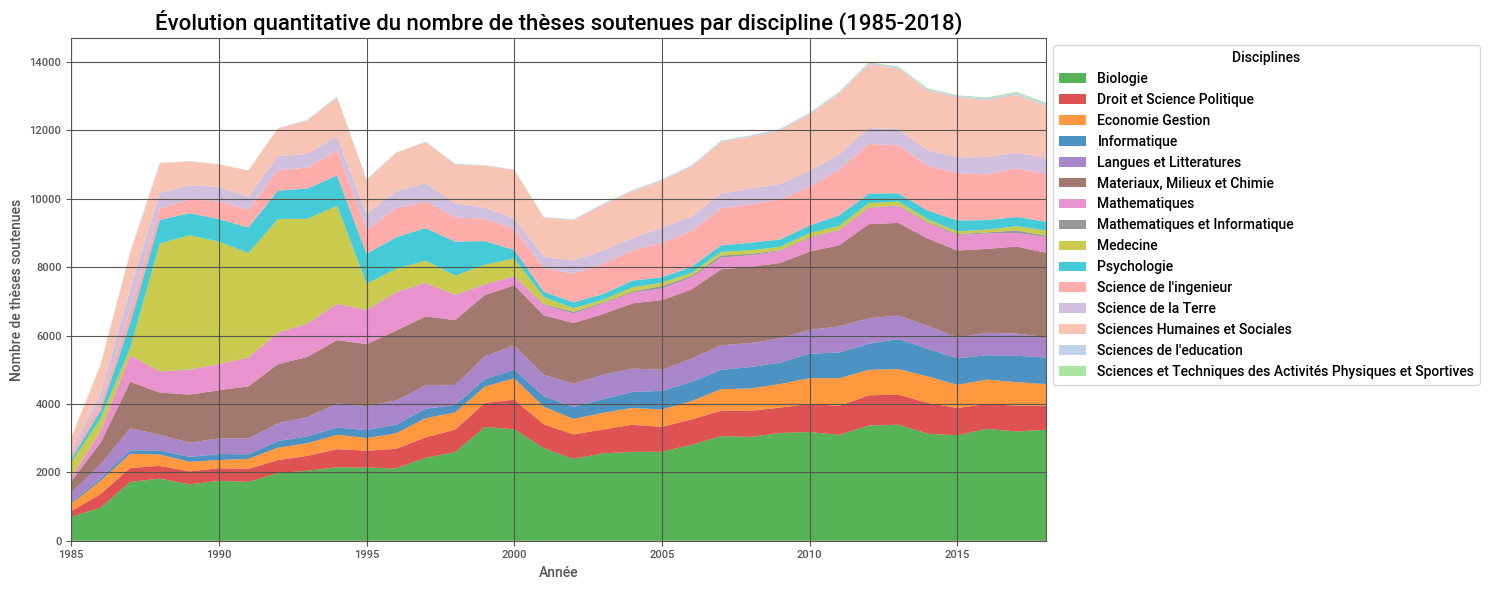

In [25]:
# Dictionnaire des matières et couleurs associées 
matieres = {
    'Biologie': '#2ca02c',  
    'Droit et Science Politique': '#d62728',  
    'Economie Gestion': '#ff7f0e',  
    'Informatique': '#1f77b4',  
    'Langues et Litteratures': '#9467bd',  
    'Materiaux, Milieux et Chimie': '#8c564b',  
    'Mathematiques': '#e377c2',  
    'Mathematiques et Informatique': '#7f7f7f',  
    'Medecine': '#bcbd22',  
    'Psychologie': '#17becf',  
    "Science de l'ingenieur": '#ff9896',  
    'Science de la Terre': '#c5b0d5',  
    'Sciences Humaines et Sociales': '#f7b7a3',  
    "Sciences de l'education": '#aec7e8',  
    'Sciences et Techniques des Activités Physiques et Sportives': '#98df8a'  
}

# Vérification 
for matière, couleur in matieres.items():
    try:
        mcolors.to_rgba(couleur)  
    except ValueError:
        print(f"Couleur invalide pour {matière}: {couleur}")

#listes des couleurs
colors = list(matieres.values())

# stackplot
plt.figure(figsize=(15, 6))
plt.stackplot(sout_disc_annee1.index, sout_disc_annee1.T, labels=sout_disc_annee1.columns, alpha=0.8, colors=colors)
plt.xlim(1985, 2018)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title="Disciplines")

# customiser le graphique
plt.title("Évolution quantitative du nombre de thèses soutenues par discipline (1985-2018)", fontsize=16, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Nombre de thèses soutenues")
plt.tight_layout()

plt.show()

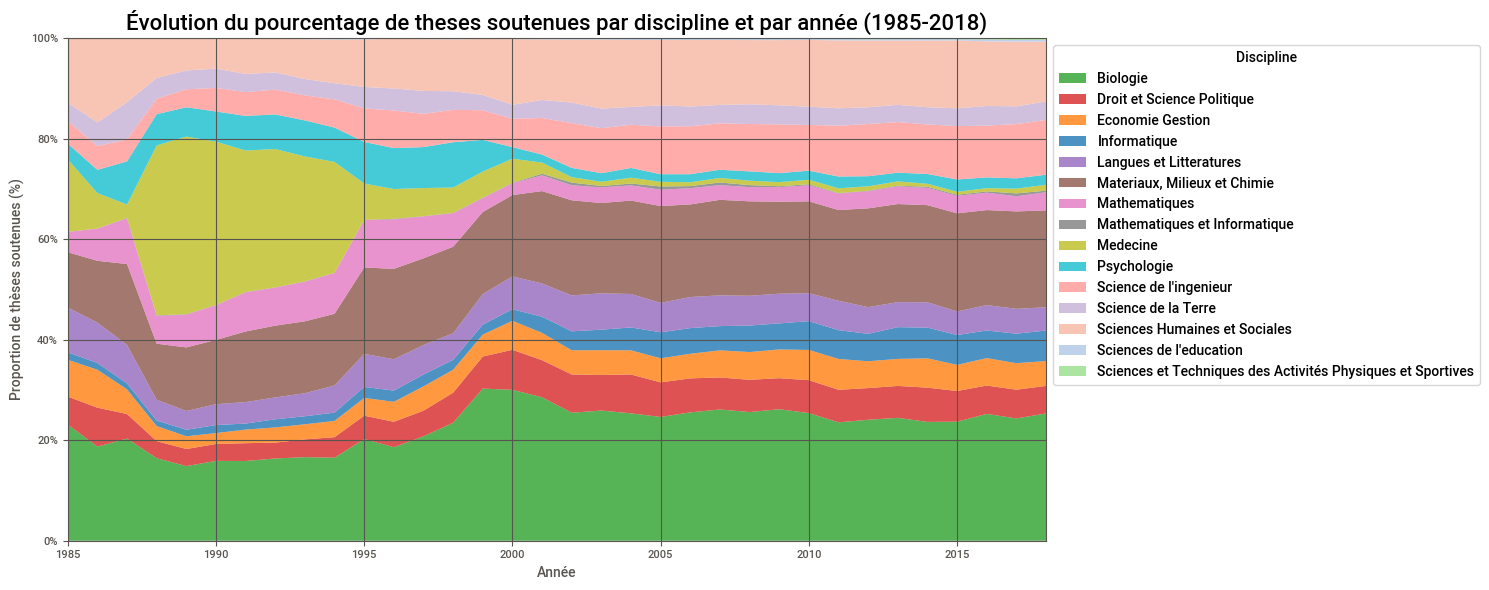

In [26]:
# Dictionnaire des matières et couleurs associées 
matieres = {
    'Biologie': '#2ca02c',  
    'Droit et Science Politique': '#d62728',  
    'Economie Gestion': '#ff7f0e',  
    'Informatique': '#1f77b4',  
    'Langues et Litteratures': '#9467bd',  
    'Materiaux, Milieux et Chimie': '#8c564b',  
    'Mathematiques': '#e377c2',  
    'Mathematiques et Informatique': '#7f7f7f',  
    'Medecine': '#bcbd22',  
    'Psychologie': '#17becf',  
    "Science de l'ingenieur": '#ff9896',  
    'Science de la Terre': '#c5b0d5',  
    'Sciences Humaines et Sociales': '#f7b7a3',  
    "Sciences de l'education": '#aec7e8',  
    'Sciences et Techniques des Activités Physiques et Sportives': '#98df8a'  
}

for matière, couleur in matieres.items():
    try:
        mcolors.to_rgba(couleur)  # Vérifie que la couleur est valide
    except ValueError:
        print(f"Couleur invalide pour {matière}: {couleur}")

# Extraire les couleurs sous forme de liste
colors = list(matieres.values())

# Normaliser les données à 100%
sout_disc_annee1_normalized = sout_disc_annee1.div(sout_disc_annee1.sum(axis=1), axis=0)

plt.figure(figsize=(15, 6))

# stackplot
plt.stackplot(sout_disc_annee1_normalized.index, sout_disc_annee1_normalized.T, 
              labels=sout_disc_annee1.columns, alpha=0.8, colors=colors)  # Passer la liste de couleurs

# Limiter l'axe des x entre 1985 et 2018
plt.xlim(1985, 2018)
plt.ylim(0, 1)

# legende
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Discipline")

# Ajouter le titre et les labels des axes
plt.title("Évolution du pourcentage de theses soutenues par discipline et par année (1985-2018)", fontsize=16, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Proportion de thèses soutenues (%)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))# formatge axe des y:
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
#Exemple ploty
fig = px.area(sout_disc_annee, x="Année", y="Nombre de Soutenances", color="Discipline", title ='Évolution des soutenances de théses par  discipline ')
fig.show()


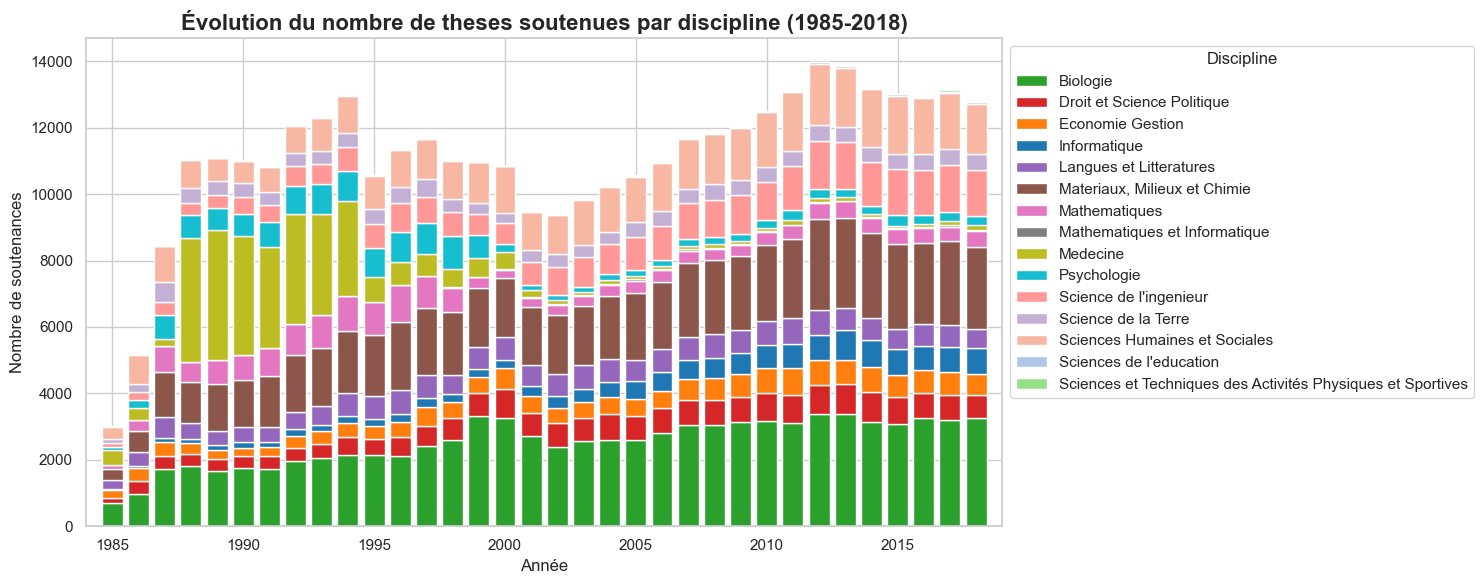

In [28]:
# Définir la palette de couleurs
matieres = {
    'Biologie': '#2ca02c',  
    'Droit et Science Politique': '#d62728',  
    'Economie Gestion': '#ff7f0e',  
    'Informatique': '#1f77b4',  
    'Langues et Litteratures': '#9467bd',  
    'Materiaux, Milieux et Chimie': '#8c564b',  
    'Mathematiques': '#e377c2',  
    'Mathematiques et Informatique': '#7f7f7f',  
    'Medecine': '#bcbd22',  
    'Psychologie': '#17becf',  
    "Science de l'ingenieur": '#ff9896',  
    'Science de la Terre': '#c5b0d5',  
    'Sciences Humaines et Sociales': '#f7b7a3',  
    "Sciences de l'education": '#aec7e8',  
    'Sciences et Techniques des Activités Physiques et Sportives': '#98df8a'  
}

# Extraire les couleurs dans l'ordre des colonnes de sout_disc_annee1
colors = [matieres[col] for col in sout_disc_annee1.columns]
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(15, 6))

# Définir l'axe x et la largeur des barres
x = sout_disc_annee1.index
bar_width = 0.8
bottom_values = np.zeros(len(x))

# Dessiner les barres empilées avec les couleurs de matières
for col, color in zip(sout_disc_annee1.columns, colors):
    ax.bar(x, sout_disc_annee1[col], bottom=bottom_values, label=col, width=bar_width, color=color)
    bottom_values += sout_disc_annee1[col]

# Limiter l'axe des X
plt.xlim(1984, 2019)

# customiser le graphique
ax.set_title("Évolution du nombre de theses soutenues par discipline (1985-2018)", fontsize=16, fontweight='bold')
ax.set_xlabel("Année")
ax.set_ylabel("Nombre de soutenances")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),title="Discipline")
plt.tight_layout()
plt.show()

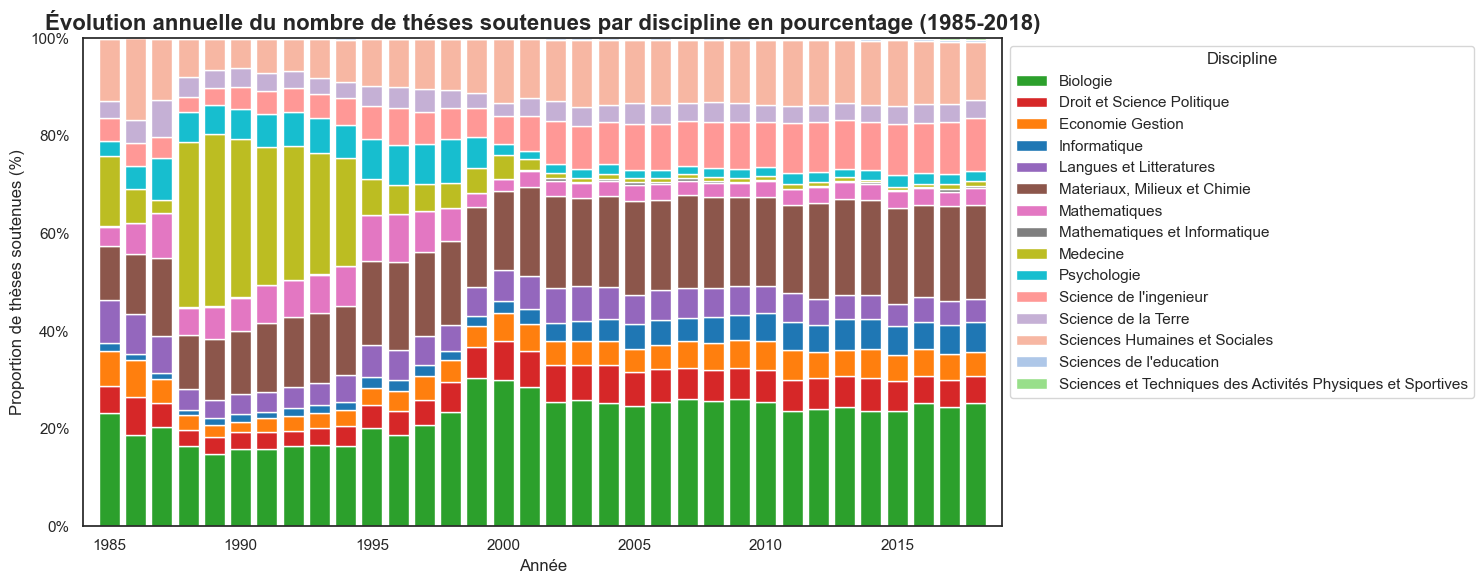

In [29]:
# Dictionnaire des matières et couleurs associées (couleurs en format hexadécimal)
matieres = {
    'Biologie': '#2ca02c',  
    'Droit et Science Politique': '#d62728',  
    'Economie Gestion': '#ff7f0e',  
    'Informatique': '#1f77b4',  
    'Langues et Litteratures': '#9467bd',  
    'Materiaux, Milieux et Chimie': '#8c564b',  
    'Mathematiques': '#e377c2',  
    'Mathematiques et Informatique': '#7f7f7f',  
    'Medecine': '#bcbd22',  
    'Psychologie': '#17becf',  
    "Science de l'ingenieur": '#ff9896',  
    'Science de la Terre': '#c5b0d5',  
    'Sciences Humaines et Sociales': '#f7b7a3',  
    "Sciences de l'education": '#aec7e8',  
    'Sciences et Techniques des Activités Physiques et Sportives': '#98df8a'  
}

# Normaliser les données pour obtenir des pourcentages par ligne
sout_disc_annee1_percentage = sout_disc_annee1.div(sout_disc_annee1.sum(axis=1), axis=0) * 100

# Extraire les couleurs dans l'ordre des colonnes de sout_disc_annee1_percentage
colors = [matieres[col] for col in sout_disc_annee1_percentage.columns]

# Paramètres pour le graphique
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(15, 6))

x = sout_disc_annee1_percentage.index
bar_width = 0.8
bottom_values = np.zeros(len(x))

# Création du graphique en pourcentage avec les couleurs des matières
for col, color in zip(sout_disc_annee1_percentage.columns, colors):
    ax.bar(x, sout_disc_annee1_percentage[col], bottom=bottom_values, label=col, width=bar_width, color=color)
    bottom_values += sout_disc_annee1_percentage[col]

# Personnalisation de l'axe X et Y
plt.xlim(1984, 2019)
ax.set_title("Évolution annuelle du nombre de théses soutenues par discipline en pourcentage (1985-2018)", fontsize=16, fontweight='bold')
ax.set_xlabel("Année")
ax.set_ylabel("Proportion de thèses soutenues (%)")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),title="Discipline")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Affichage du graphique
plt.tight_layout()
plt.show()


## Exercice 2 :

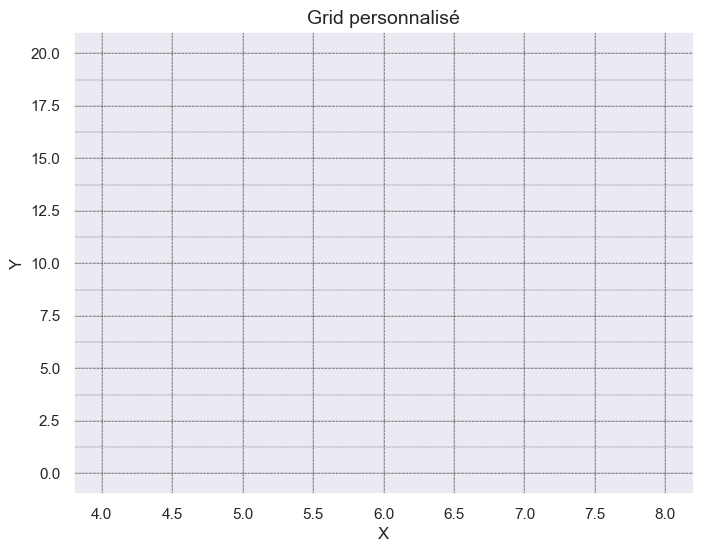

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

#  lignes horizontales
for val in np.linspace(0, 20, 17): 
    plt.axhline(y=val, color='black', linestyle='-.', linewidth=0.2, zorder=1) #distance entre les lignes et priorité de visibilité de la lignes
# lignes verticales
for val in np.linspace(4, 8, 9): 
    plt.axvline(x=val, color='black', linestyle='-.', linewidth=0.2, zorder=1)#distance entre les lignes et priorité de visibilité de la lignes
plt.title('Grid personnalisé', fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.show()

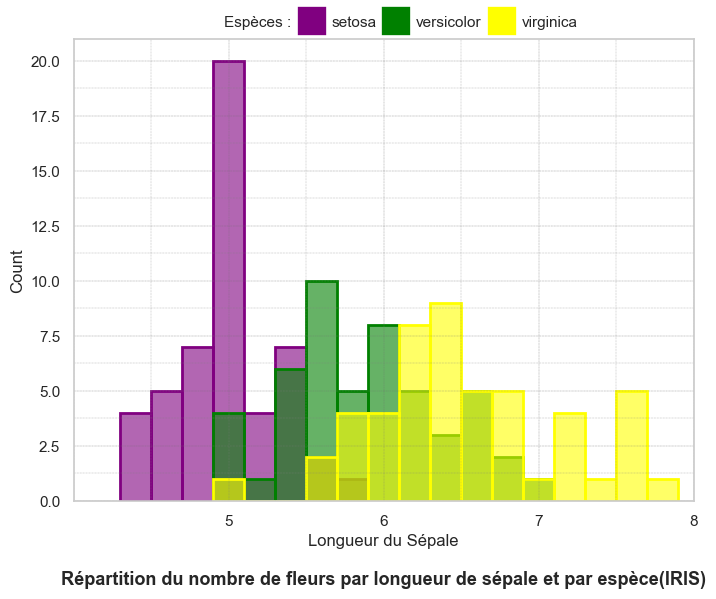

In [31]:
sns.set_style("whitegrid")

#Charger le jeu de données
iris = sns.load_dataset('iris')

#figure 
plt.figure(figsize=(8, 6))
colors = {'setosa': 'purple', 'versicolor': 'green', 'virginica': 'yellow'}

# Nous allons mainternant tracer les histogrammes :
for specie in iris['species'].unique():
    sns.histplot(iris[iris['species'] == specie]['sepal_length'], kde=False, color=colors[specie], alpha=0.6,
                 label=specie, binwidth=0.2, linewidth=2, edgecolor=colors[specie], stat='count')

# lignes horizontales et verticales
for val in np.arange(0, 21, 1.25): 
    plt.axhline(y=val, color='gray', linestyle='-.', linewidth=0.2)
for val in np.arange(4, 8.1, 0.5): 
    plt.axvline(x=val, color='gray', linestyle='-.', linewidth=0.2)

# Paramètres des axes
plt.xlabel('Longueur du Sépale')
plt.ylabel('Count')
plt.xlim(4, 8)  # Limiter l'axe X entre 4 et 8
plt.xticks(np.arange(5, 9, 1), [5, 6, 7, 8])  # Ajuster les ticks

# Personnaliser la grille
plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.3, alpha=0.3)

# Personnalisér la legendes carrés
# Augmenter la taille des carrés en ajustant markersize
handles = [Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=15,markeredgecolor=color,  
        markeredgewidth=6, label=specie)
           for specie, color in colors.items()]  

# Créer un handle pour le titre "Espèce :"
title_handle = Line2D([0], [0], color='w', label='Espèces :')

# Ajouter la légende avec le titre et les carrés colorés
plt.legend(handles=[title_handle] + handles, loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4, 
           frameon=False, handletextpad=0.3, columnspacing=0.3)  # Ajuster handletextpad distance entre titre et legende et columnspacing distance entre les handles de la légende

# Titre en bas et en gras
plt.title('Répartition du nombre de fleurs par longueur de sépale et par espèce(IRIS)', fontsize=13, fontweight='bold', loc='center', y=-0.2)
plt.show()


## Exercice 3 :

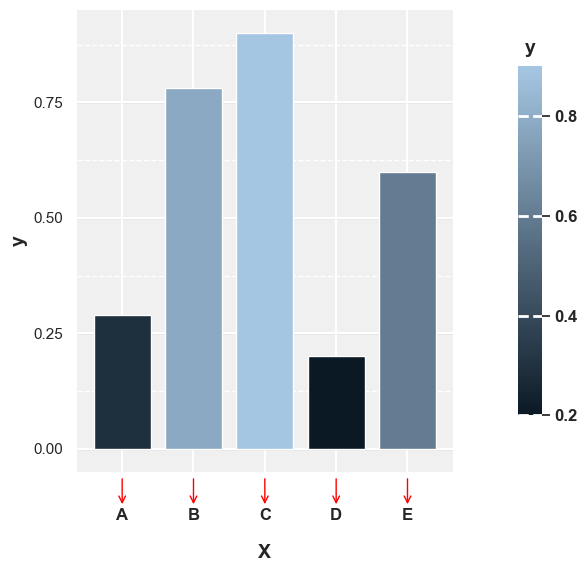

In [32]:
# Données
x = ['A', 'B', 'C', 'D', 'E']
y = [0.29, 0.78, 0.9, 0.2, 0.6]

# Définir la palette personnalisée entre #0b1925 et #a5c6e2
colors = [(11/255, 25/255, 37/255), (165/255, 198/255, 226/255)]  
cmap = LinearSegmentedColormap.from_list("custom_blues", colors)

# Création du barplot
plt.figure(figsize=(6, 6))

ax = plt.gca()
ax.set_facecolor('#f0f0f0')  #  un fond gris très clair

# Ajouter des lignes horizontales pour les intervalles de 0.25
for val in np.arange(0, 1.05, 0.25):
    plt.axhline(y=val, color='white', linestyle='-', linewidth=1.5, zorder=1)

# Ajouter des lignes horizontales plus fines pour les intervalles de 0.125
for val in np.arange(0, 1.05, 0.125):
    if val % 0.25 != 0:  # Exclure les lignes déjà tracées pour 0.25
        plt.axhline(y=val, color='white', linestyle='--', linewidth=1, zorder=1)

# Normalisation des valeurs de 'y' entre 0.2 et 0.9
min_val = 0.2
max_val = 0.9
norm = plt.Normalize(min_val, max_val)

colors = cmap(norm(y))  # Appliquer le dégradé

bars = plt.bar(x, y, color=colors, zorder=2)  # Appliquer les couleurs de la palette et zorder plus élevé pour les barres

# Ajouter une barre de couleurs
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  
sm.set_array([])  

# Création de la colorbar avec un aspect ajusté
cbar = plt.colorbar(sm, ax=ax, fraction=0.05, pad=0.14, aspect=15)  

# Enlever l'encadrement de la colorbar
cbar.outline.set_visible(False)

cbar.ax.set_title('y', fontsize=14, fontweight='bold', pad=10)  # Positionner le titre colbar

# Rendre les ticks de la colorbar en gras
cbar.ax.yaxis.set_tick_params(labelsize=12)  
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold') 

cbar.set_ticks(np.arange(min_val, max_val + 0.1, 0.2))  # Ticks de 0.2 à 0.9

# Ajouter des tirets blancs aux ticks 0.2, 0.4, 0.6 et 0.8
for tick in np.arange(0.2, 1.0, 0.2):
    cbar.ax.axhline(y=tick, color='white', linestyle='--', linewidth=2)

plt.xlabel('X', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('y', fontsize=14, fontweight='bold')

# Ajuster les ticks de l'axe Y
ax.set_yticks(np.arange(0, 1.05, 0.25))  


plt.ylim(-0.05, 0.95)

# Ajouter la grille verticale en blanc, mais en arrière des barres
plt.grid(True, axis='x', color='white', linestyle='-', linewidth=1.5, zorder=0)  

# Ajouter des flèches rouges sous le graphique, mais en dehors de l'aire du graphique avec la tête de la flèche vers le bas
for tick in ax.get_xticks():
    # Position des flèches (elles sont en dehors du graphique)
    ax.annotate('', xy=(tick, -0.05), xytext=(tick, -0.12),  # Position des flèches
                arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='<-', lw=1, shrinkA=0, shrinkB=5, zorder=3))

# Déplacer les labels juste sous les flèches
ax.set_xticklabels(x, fontsize=12, fontweight='bold', rotation=0, ha='center', position=(0, -0.05))

# Enlever la bordure noire
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()


- J'ai pris la liberté de telecharger un fichier dans le site de l'Agence Nationale de la Statistique et de la Démographique du Sénégal car je n'ai pas trouver de données pour la figure 3 du devoir. Je vais maintenant l'utiliser pour le travail demandé.

In [33]:
recensement = pd.read_csv("data-recensement.csv")

In [34]:
recensement.head()

Region Departement COM_ARRT_VILLE  COMMUNE QUARTIER_VILLAGE_HAMEAU  \
0  ZIGUINCHOR     BIGNONA        BIGNONA  BIGNONA                 BASSENE   
1  ZIGUINCHOR     BIGNONA        BIGNONA  BIGNONA           CHATEAU D'EAU   
2  ZIGUINCHOR     BIGNONA        BIGNONA  BIGNONA                KADIAMOR   
3  ZIGUINCHOR     BIGNONA        BIGNONA  BIGNONA              MANGUILINE   
4  ZIGUINCHOR     BIGNONA        BIGNONA  BIGNONA          MEDINA PLATEAU   

   CONCESSION  MENAGE  HOMMES  FEMMES  POPULATION  
0         575     829    3169    3034        6203  
1         389     658    2266    2166        4432  
2         569     663    2315    2260        4575  
3         334     453    1529    1618        3147  
4         980    1493    5301    4984       10285

In [35]:
recensement.shape


(520, 10)

In [36]:
recensement['COMMUNE'].unique()

array(['BIGNONA', 'THIONCK ESSYL', 'DJIBIDIONE', 'OULAMPANE', 'SINDIAN',
       'SUELLE', 'BALINGHORE', 'DIEGOUNE', 'KARTIACK', 'MANGAGOULACK',
       'MLOMP', 'COUBALAN', 'NIAMONE', 'OUONCK', 'TENGHORI', 'DJINAKY',
       'KAFOUNTINE', 'KATABA 1', 'DIOULOULOU'], dtype=object)

In [37]:
recensement['QUARTIER_VILLAGE_HAMEAU'].nunique()

513

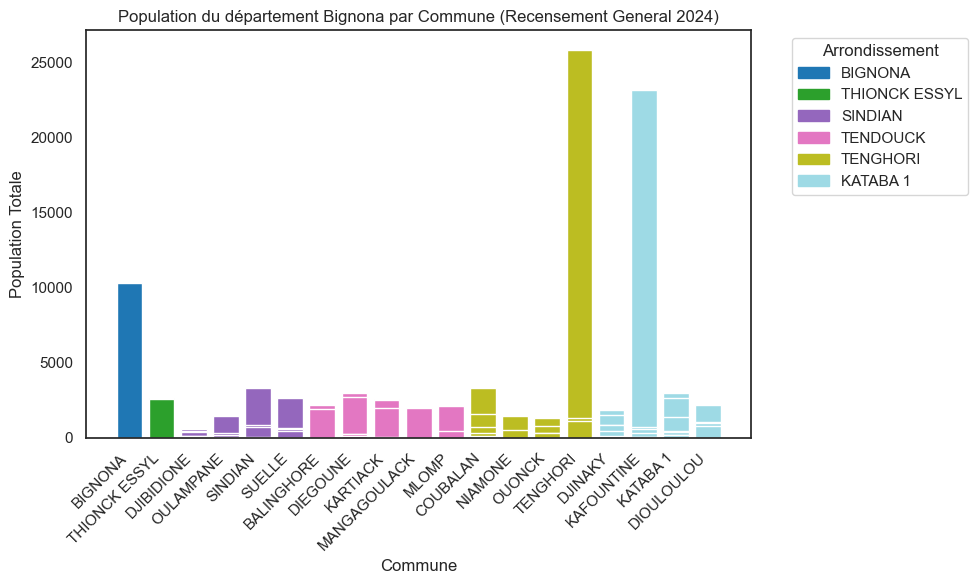

In [57]:
sns.set_style("white")

plt.figure(figsize=(10, 6))

# Extraire les valeurs uniques de COM_ARRT_VILLE pour générer des couleurs
com_arrt_ville_unique = recensement['COM_ARRT_VILLE'].unique()

# Créer une palette de couleurs
colors = plt.cm.get_cmap('tab20', len(com_arrt_ville_unique)) 

# Créer un dictionnaire pour associer chaque COM_ARRT_VILLE à une couleur
color_dict = {com: colors(i) for i, com in enumerate(com_arrt_ville_unique)}

bars = plt.bar(recensement['COMMUNE'], recensement['POPULATION'], 
               color=[color_dict[com] for com in recensement['COM_ARRT_VILLE']])
plt.xlabel('Commune')
plt.ylabel('Population Totale')
plt.title('Population du département Bignona par Commune (Recensement General 2024)')

# Ajuster les xticks pour qu'ils soient bien alignés avec les barres
plt.xticks(rotation=45, ha='right')

# Ajouter une légende pour les couleurs 
handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[com]) for com in com_arrt_ville_unique]
plt.legend(handles, com_arrt_ville_unique, title='Arrondissement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

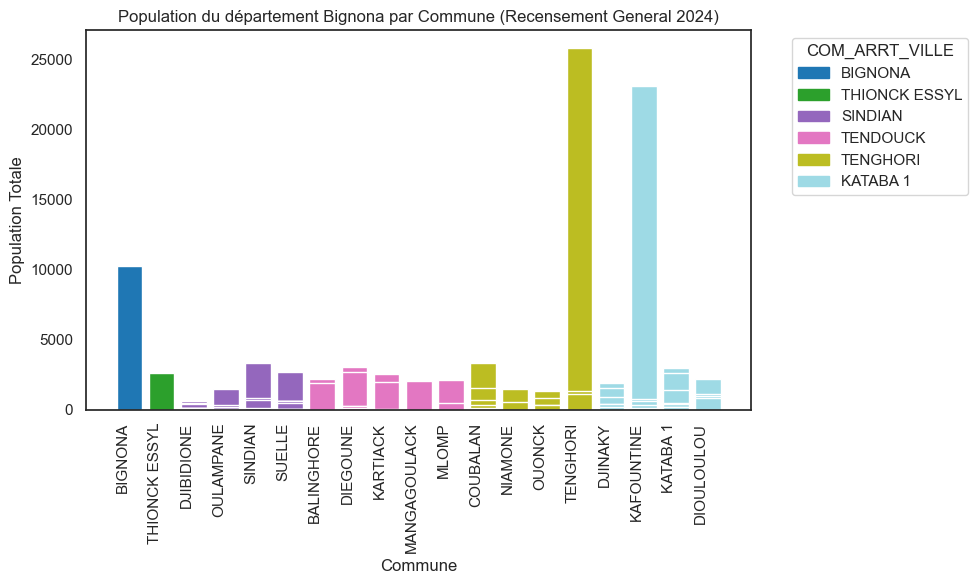

In [39]:
plt.figure(figsize=(10, 6))
com_arrt_ville_unique = recensement['COM_ARRT_VILLE'].unique()
colors = plt.cm.get_cmap('tab20', len(com_arrt_ville_unique))  # Choisir une palette appropriée
color_dict = {com: colors(i) for i, com in enumerate(com_arrt_ville_unique)}
bars = plt.bar(recensement['COMMUNE'], recensement['POPULATION'], 
               color=[color_dict[com] for com in recensement['COM_ARRT_VILLE']])
plt.xlabel('Commune')
plt.ylabel('Population Totale')
plt.title('Population du département Bignona par Commune (Recensement General 2024)')

plt.xticks(rotation=90, ha='right')

# Ajouter une légende pour les couleurs (basée sur COM_ARRT_VILLE)
handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[com]) for com in com_arrt_ville_unique]
plt.legend(handles, com_arrt_ville_unique, title='Arrondissement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Exercice 4 :

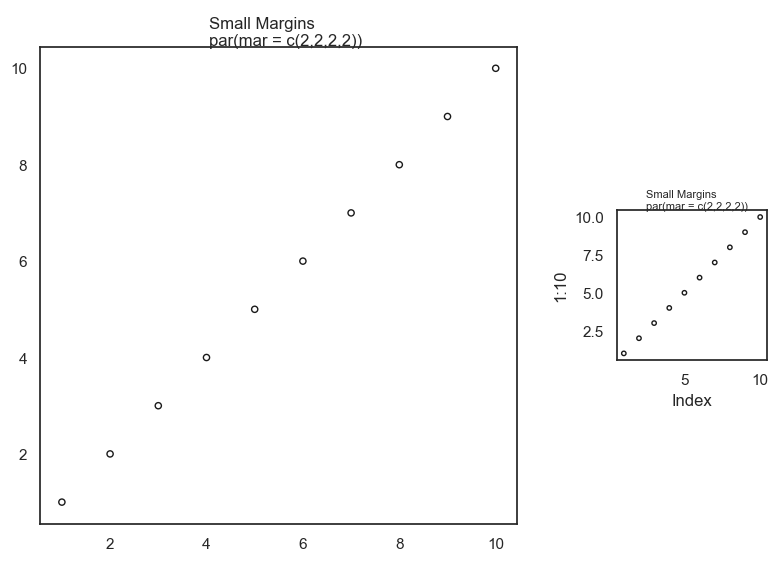

In [40]:
sns.set_style("white")

fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])  # Le premier graphique est 2 fois plus large

# Créer les listes X et Y
X = list(range(1, 11))
Y = list(range(1, 11))

# Premier graphique
ax0 = fig.add_subplot(gs[0])
ax0.scatter(X, Y, marker='o', facecolors='none', edgecolors='k', s=20)
ax0.set_aspect('equal', adjustable='box')#graphique carré
# Ajouter la légende au premier graphique
ax0.legend(['Small Margins\npar(mar = c(2,2,2,2))'], 
           loc='center',  
           fontsize=12, 
           bbox_to_anchor=(0.5, 1.03),  # Placer la légende au-dessus du graphique
           frameon=False,
           handlelength=0,  # Supprimer les handles
           markerscale=0,  # Enlever le marqueur
           labelspacing=1.5)

# Deuxième graphique, centré dans la deuxième colonne
# Nous centrons le graphique dans la partie droite de la figure
ax1 = fig.add_axes([0.75, 0.375, 0.25, 0.25])  # Le 0.75 est la position x pour centrer
ax1.scatter(X, Y, marker='o', facecolors='none', edgecolors='k', s=10)
ax1.set_xlabel('Index')  # étiquette pour l'axe des X
ax1.set_ylabel('1:10')   # étiquette pour l'axe des Y

# Ajuster les limites pour forcer un graphique carré
ax1.set_aspect('equal', adjustable='box')

# Ajouter une légende au second graphique
ax1.legend(['Small Margins\npar(mar = c(2,2,2,2))'], 
           loc='center',  
           fontsize=8, 
           bbox_to_anchor=(0.5, 1.065),  # Placer la légende au-dessus du graphique
           frameon=False,
           handlelength=0,  # Supprimer les handles
           markerscale=0,  # Enlever le marqueur
           labelspacing=1.5)

plt.tight_layout() 
plt.show()


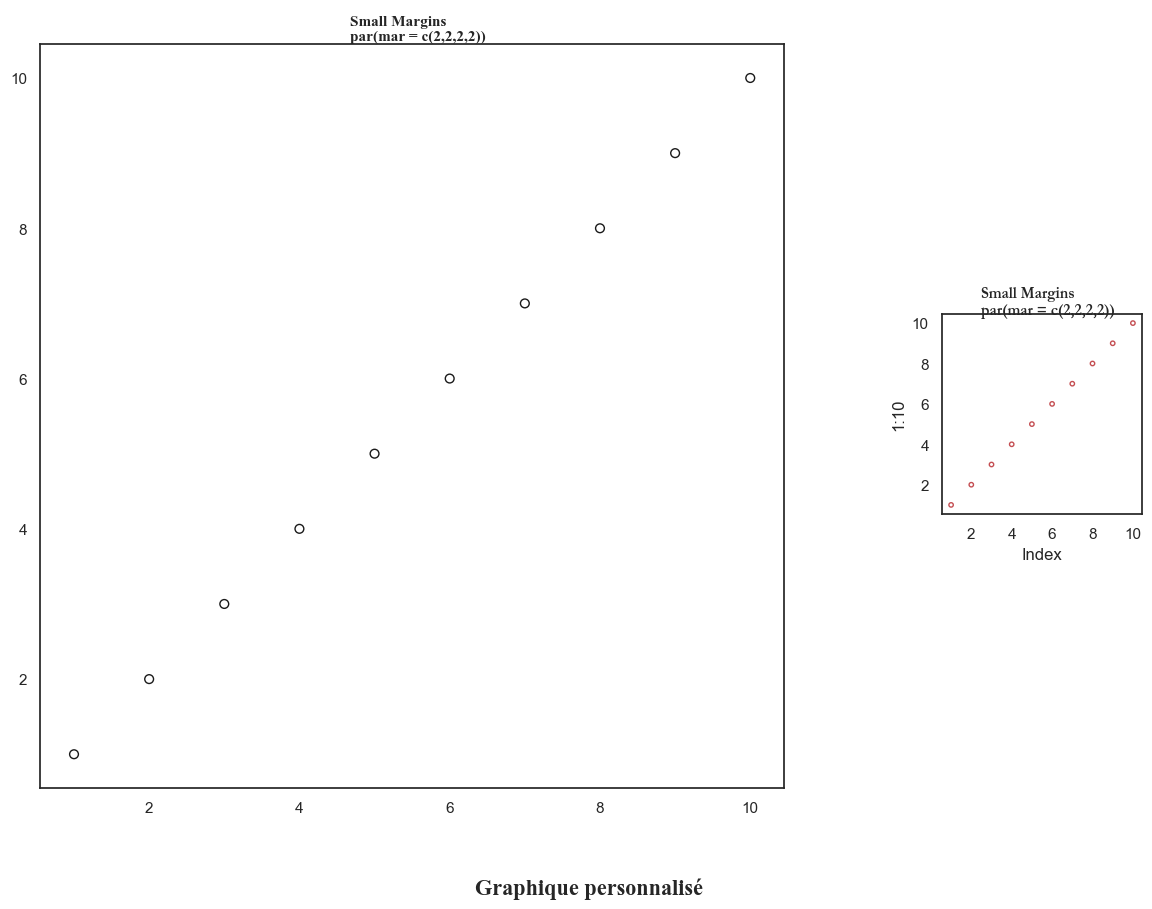

In [41]:

fig = plt.figure(figsize=(12, 8))
# Gridspec pour une disposition 1x2 avec des ratios de largeur
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])  # Le premier graphique est 2 fois plus large
X = list(range(1, 11))
Y = list(range(1, 11))

# Premier sous-graphe 
ax0 = fig.add_subplot(gs[0])
ax0.scatter(X, Y, marker='o', facecolors='none', edgecolors='k', s=40)
ax0.set_aspect('equal', adjustable='box')

# Ajouter la légende au premier graphique
ax0.legend(['Small Margins\npar(mar = c(2,2,2,2))'], 
           loc='center',  
           fontsize=16, 
           bbox_to_anchor=(0.5, 1.02),  # Placer la légende au-dessus du graphique
           frameon=False,
           handlelength=0,  # Supprimer les handles
           markerscale=0,  # Enlever le marqueur
           labelspacing=1.5,
           prop={'family': 'Times New Roman', 'weight': 'bold'})

# Deuxième sous-graphe (4x4), centré dans la deuxième colonne
# Nous centrons le graphique dans la partie droite de la figure
ax1 = fig.add_axes([0.75, 0.375, 0.25, 0.25])  # Le 0.75 est la position x pour centrer
ax1.scatter(X, Y, marker='o', facecolors='none', edgecolors='r', s=10)
ax1.set_xlabel('Index')  # Ajouter l'étiquette pour l'axe des X
ax1.set_ylabel('1:10')   # Ajouter l'étiquette pour l'axe des Y
ax1.set_aspect('equal', adjustable='box')

# Ajouter une légende au second graphique
ax1.legend(['Small Margins\npar(mar = c(2,2,2,2))'], 
           loc='center',  
           fontsize=8, 
           bbox_to_anchor=(0.5, 1.06),  # Placer la légende au-dessus du graphique
           frameon=False,
           handlelength=0,  # Supprimer les handles
           markerscale=0,  # Enlever le marqueur
           labelspacing=1.5,
           prop={'family': 'Garamond', 'weight': 'bold'})  # Retirer l'espace supplémentaire

# Définir les ticks de l'axe X du deuxième graphique à [2, 4, 6, 8]
ax1.set_xticks([2, 4, 6, 8, 10])

fig.text(0.5, -0.1, "Graphique personnalisé ", 
         ha='center', fontsize=16, fontweight='bold', fontfamily='Times New Roman')
plt.tight_layout()  
plt.show()


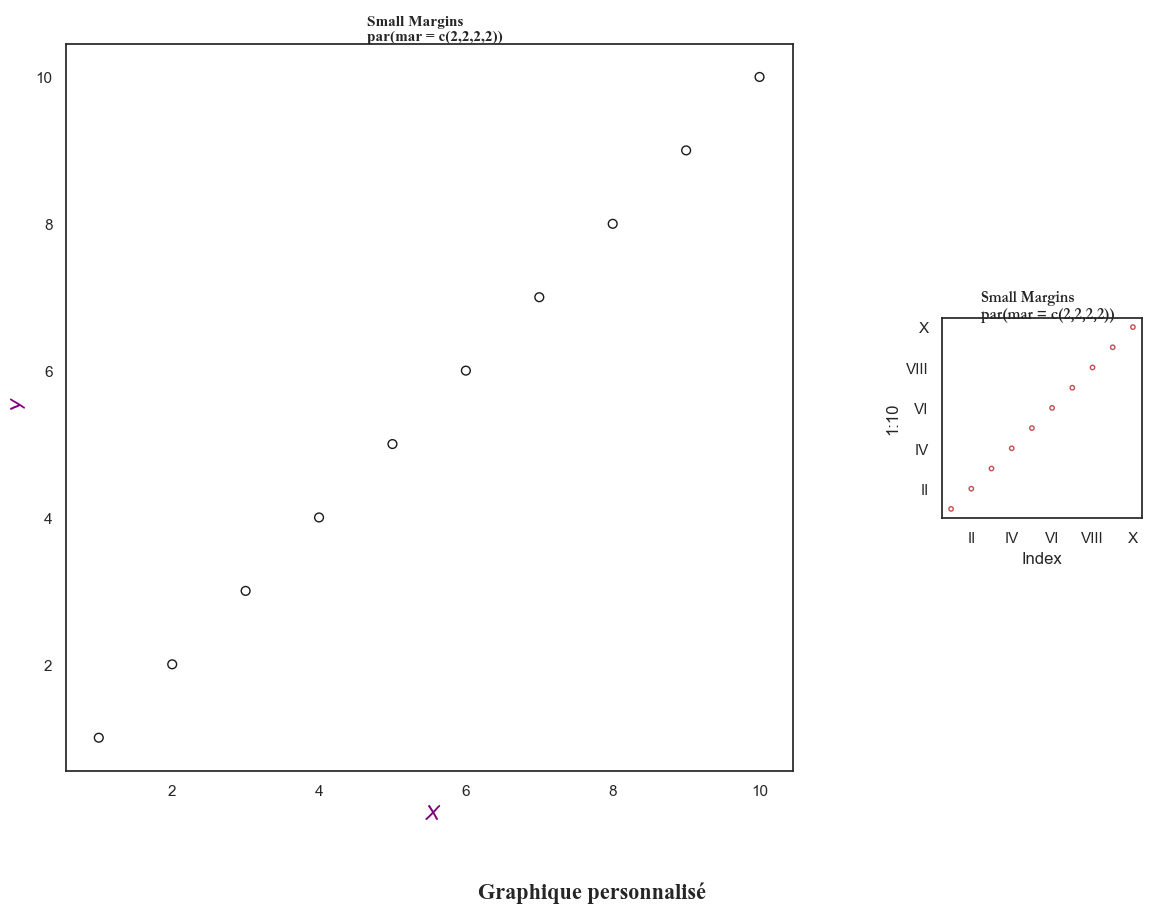

In [42]:
sns.set_style("white")

#chiffres romains :
def to_roman(x, pos=None):
    roman_numerals = [
        (10, 'X'), (9, 'IX'), (5, 'V'), (4, 'IV'), (1, 'I')
    ]
    result = ''
    for value, numeral in roman_numerals:
        while x >= value:
            result += numeral
            x -= value
    return result

# Créer une figure
fig = plt.figure(figsize=(12, 8))

# Gridspec pour une disposition 1x2 avec des ratios de largeur
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])  # Le premier graphique est 2 fois plus large

X = list(range(1, 11))
Y = list(range(1, 11))

# Premier graphique
ax0 = fig.add_subplot(gs[0])
ax0.scatter(X, Y, marker='o', facecolors='none', edgecolors='k', s=40)

ax0.set_aspect('equal', adjustable='box')#ajuster graphique

# Changer le format d'écriture des labels du premier graphique
ax0.set_xlabel(' X', fontsize=14, family='Comic Sans MS', style='italic', weight='normal', color='purple')
ax0.set_ylabel(' Y', fontsize=14, family='Comic Sans MS', style='italic', weight='normal', color='purple')

# Ajouter la légende au premier graphique
ax0.legend(['Small Margins\npar(mar = c(2,2,2,2))'], 
           loc='center',  
           fontsize=16, 
           bbox_to_anchor=(0.5, 1.02),  # Placer la légende au-dessus du graphique
           frameon=False,
           handlelength=0,  # Supprimer les handles
           markerscale=0,  # Enlever le marqueur
           labelspacing=1.5,
           prop={'family': 'Times New Roman', 'weight': 'bold'})

# Deuxième graphique , centré dans la deuxième colonne
ax1 = fig.add_axes([0.75, 0.375, 0.25, 0.25])  # Le 0.75 est la position x pour centrer
ax1.scatter(X, Y, marker='o', facecolors='none', edgecolors='r', s=10)
ax1.set_xlabel('Index')  # Legende pour l'axe des X
ax1.set_ylabel('1:10')   # Legende pour l'axe des Y

ax1.set_aspect('equal', adjustable='box')

#  légende au second graphique
ax1.legend(['Small Margins\npar(mar = c(2,2,2,2))'], 
           loc='center',  
           fontsize=8, 
           bbox_to_anchor=(0.5, 1.06),  # Placer la légende au-dessus du graphique
           frameon=False,
           handlelength=0,  # Supprimer les handles
           markerscale=0,  # Enlever le marqueur
           labelspacing=1.5,
           prop={'family': 'Garamond', 'weight': 'bold'})  # Retirer l'espace supplémentaire

# Définir les ticks de l'axe X du deuxième graphique à [2, 4, 6, 8]
ax1.set_xticks([2, 4, 6, 8, 10])

# formatage pour les axes X et Y
ax1.xaxis.set_major_formatter(FuncFormatter(to_roman)) 
ax1.yaxis.set_major_formatter(FuncFormatter(to_roman)) 


#Titre du graphique subplots
fig.text(0.5, -0.1, "Graphique personnalisé", 
         ha='center', fontsize=16, fontweight='bold', fontfamily='Times New Roman')
plt.tight_layout() 
plt.show()


## Exercice 5:

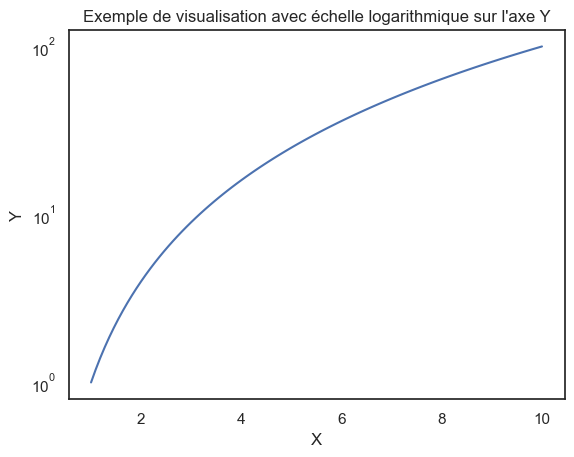

In [43]:
#echelle logarithmique sur l axe des X
x = np.linspace(1, 10, 100)
y = x ** 2  # relation quadriatique

plt.plot(x, y, label="y = x^2")

# échelle logarithmique sur l'axe Y
plt.yscale('log')

plt.title("Exemple de visualisation avec échelle logarithmique sur l'axe Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


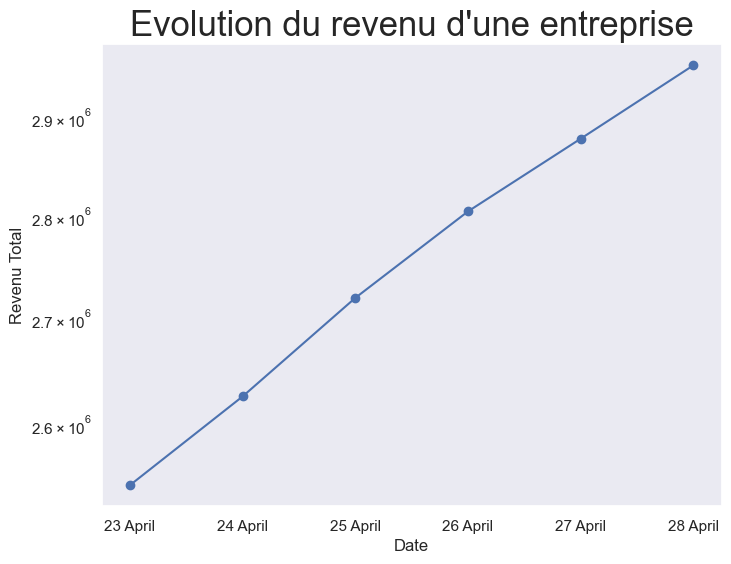

In [44]:
sns.set_style("dark")

#Autre exemple
date = ["28 April", "27 April", "26 April", "25 April", "24 April", "23 April"]
revenue = [2954222, 2878196, 2804796, 2719896, 2626321, 2544792]


company_data_df = pd.DataFrame({"date": date, "total_revenue": revenue})
company_data = company_data_df.sort_values(by=["total_revenue"])
fig = plt.figure(figsize=(8, 6))
plt.scatter(company_data["date"], company_data["total_revenue"])
plt.plot(company_data["date"], company_data["total_revenue"])
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Revenu Total")
plt.title("Evolution du revenu d'une entreprise", fontsize=25)
plt.show()

## Exercice 6

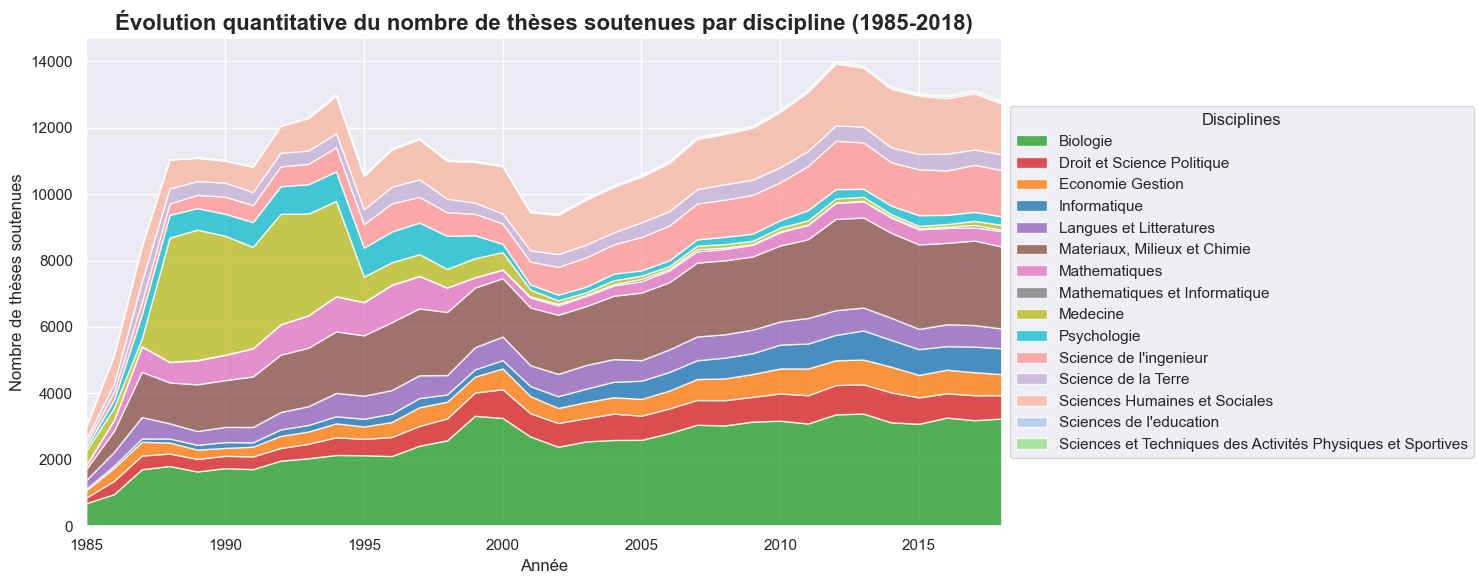

In [45]:
# Dictionnaire des matières et couleurs associées 
matieres = {
    'Biologie': '#2ca02c',  
    'Droit et Science Politique': '#d62728',  
    'Economie Gestion': '#ff7f0e',  
    'Informatique': '#1f77b4',  
    'Langues et Litteratures': '#9467bd',  
    'Materiaux, Milieux et Chimie': '#8c564b',  
    'Mathematiques': '#e377c2',  
    'Mathematiques et Informatique': '#7f7f7f',  
    'Medecine': '#bcbd22',  
    'Psychologie': '#17becf',  
    "Science de l'ingenieur": '#ff9896',  
    'Science de la Terre': '#c5b0d5',  
    'Sciences Humaines et Sociales': '#f7b7a3',  
    "Sciences de l'education": '#aec7e8',  
    'Sciences et Techniques des Activités Physiques et Sportives': '#98df8a'  
}


#listes des couleurs
colors = list(matieres.values())

# stackplot
plt.figure(figsize=(15, 6))
plt.stackplot(sout_disc_annee1.index, sout_disc_annee1.T, labels=sout_disc_annee1.columns, alpha=0.8, colors=colors)
plt.xlim(1985, 2018)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Disciplines")#legende au centre droit 

# customiser le graphique
plt.title("Évolution quantitative du nombre de thèses soutenues par discipline (1985-2018)", fontsize=16, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Nombre de thèses soutenues")
plt.tight_layout()

plt.show()

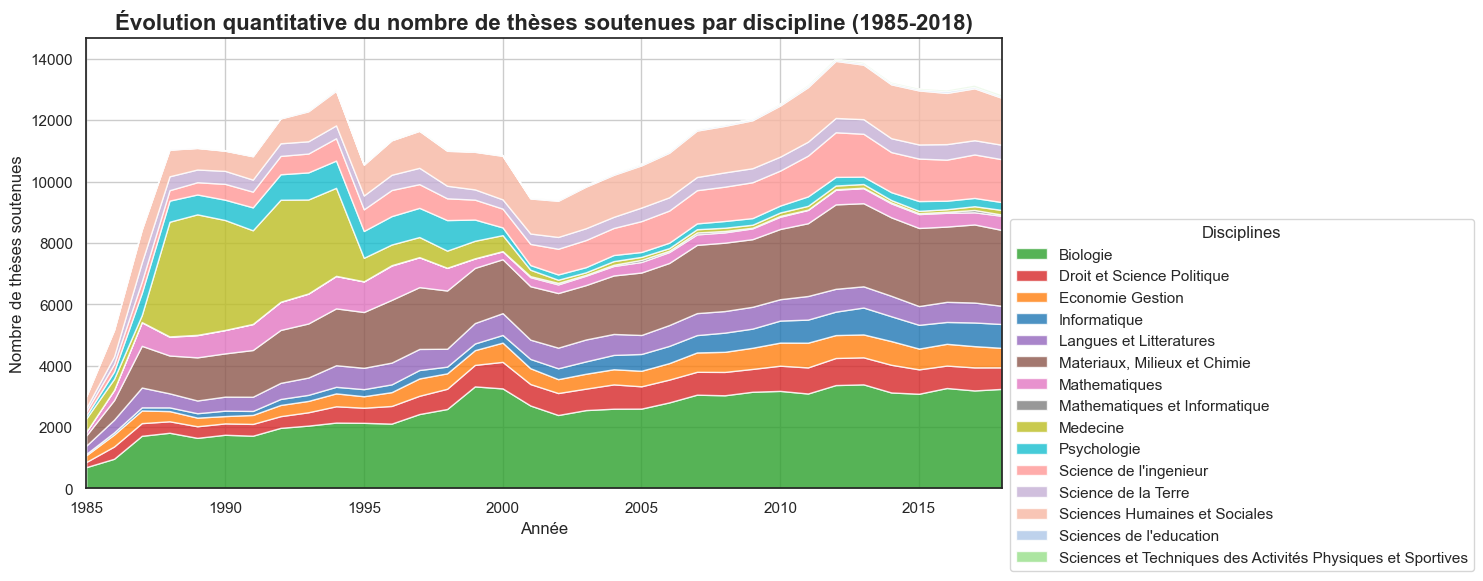

In [56]:
# Dictionnaire des matières et couleurs associées 
matieres = {
    'Biologie': '#2ca02c',  
    'Droit et Science Politique': '#d62728',  
    'Economie Gestion': '#ff7f0e',  
    'Informatique': '#1f77b4',  
    'Langues et Litteratures': '#9467bd',  
    'Materiaux, Milieux et Chimie': '#8c564b',  
    'Mathematiques': '#e377c2',  
    'Mathematiques et Informatique': '#7f7f7f',  
    'Medecine': '#bcbd22',  
    'Psychologie': '#17becf',  
    "Science de l'ingenieur": '#ff9896',  
    'Science de la Terre': '#c5b0d5',  
    'Sciences Humaines et Sociales': '#f7b7a3',  
    "Sciences de l'education": '#aec7e8',  
    'Sciences et Techniques des Activités Physiques et Sportives': '#98df8a'  
}


#listes des couleurs
colors = list(matieres.values())

# stackplot
plt.figure(figsize=(15, 6))
plt.stackplot(sout_disc_annee1.index, sout_disc_annee1.T, labels=sout_disc_annee1.columns, alpha=0.8, colors=colors)
plt.xlim(1985, 2018)
plt.grid(True)
plt.legend(loc='lower left', bbox_to_anchor=(1, -0.2),title="Disciplines")#legende en bas à droite

# customiser le graphique
plt.title("Évolution quantitative du nombre de thèses soutenues par discipline (1985-2018)", fontsize=16, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Nombre de thèses soutenues")
plt.tight_layout()

plt.show()

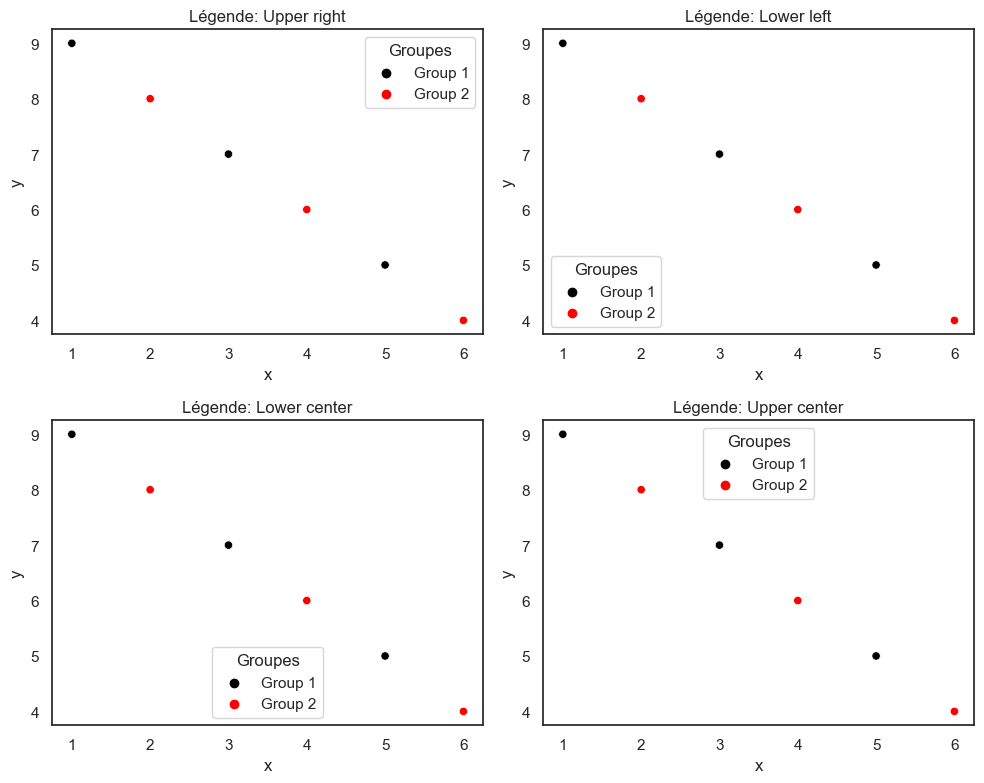

In [47]:
sns.set_style("white")

y = [9,8,7,6,5,4]
x = [1,2,3,4,5,6]
z= ["Group 1", "Group 2","Group 1", "Group 2","Group 1", "Group 2"]
d = pd.DataFrame({"x": x, "y": y, "Group": z})
palette = {"Group 1": "black", "Group 2": "red"}
legend_positions = ["upper right", "lower left", "lower center", "upper center"] #localisation legende

fig, axes = plt.subplots(2, 2, figsize=(10, 8))#creation du subplot

#boucle pour avoir des graphiques identiques et locaslisations de legendes differentes :
for ax, loc in zip(axes.flat, legend_positions):
    sns.scatterplot(data=d, x="x", y="y", hue="Group", palette=palette, ax=ax)
    ax.legend(title="Groupes", loc=loc)
    ax.set_title(f"Légende: {loc.replace('_', ' ').capitalize()}")
plt.tight_layout()
plt.show()


## Exercice 7 :

Nous avions deja créer une palette personnalisée dans l'exercice 1, nous allons essayer maintenant d'utiliser des palettes prédéfinies.

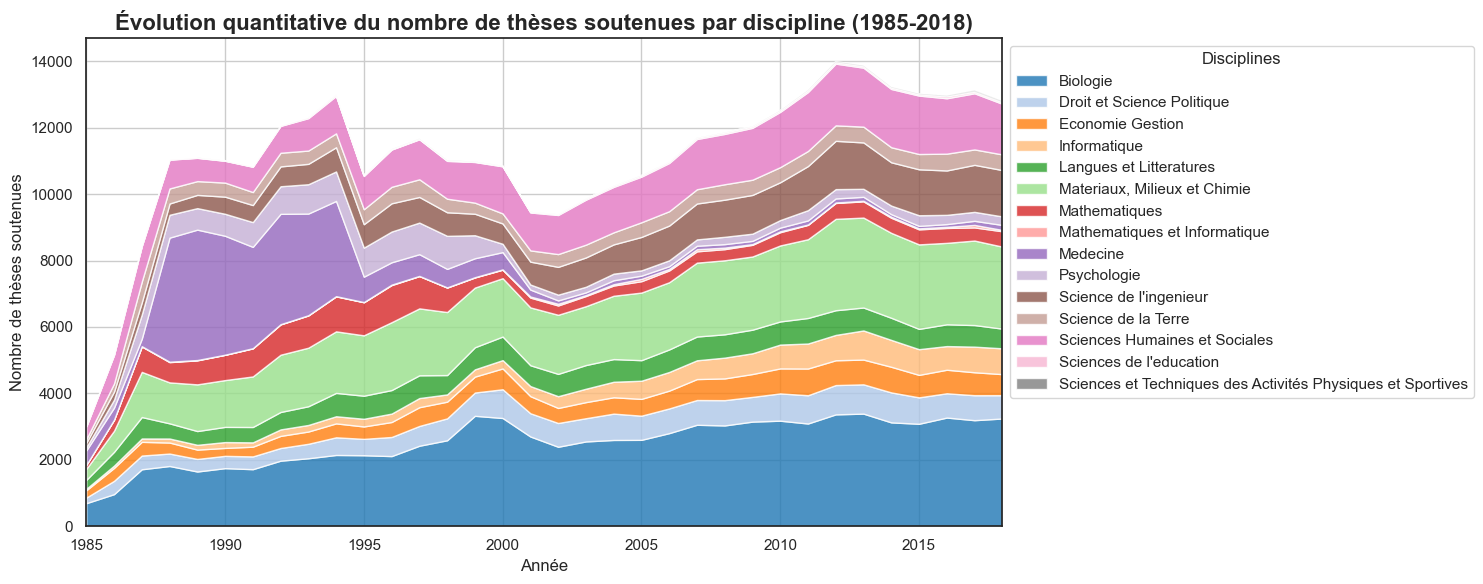

In [48]:
palette = sns.color_palette("tab20", 15)
#  couleurs
colors = palette  # Vous utilisez directement la palette tab20
plt.figure(figsize=(15, 6))
plt.stackplot(sout_disc_annee1.index, sout_disc_annee1.T, labels=sout_disc_annee1.columns, alpha=0.8, colors=palette)
plt.xlim(1985, 2018)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Disciplines")
plt.title("Évolution quantitative du nombre de thèses soutenues par discipline (1985-2018)", fontsize=16, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Nombre de thèses soutenues")
plt.tight_layout()
plt.show()

## Exercice 8 :

Nous allons inverser les disciplines dans la legende :

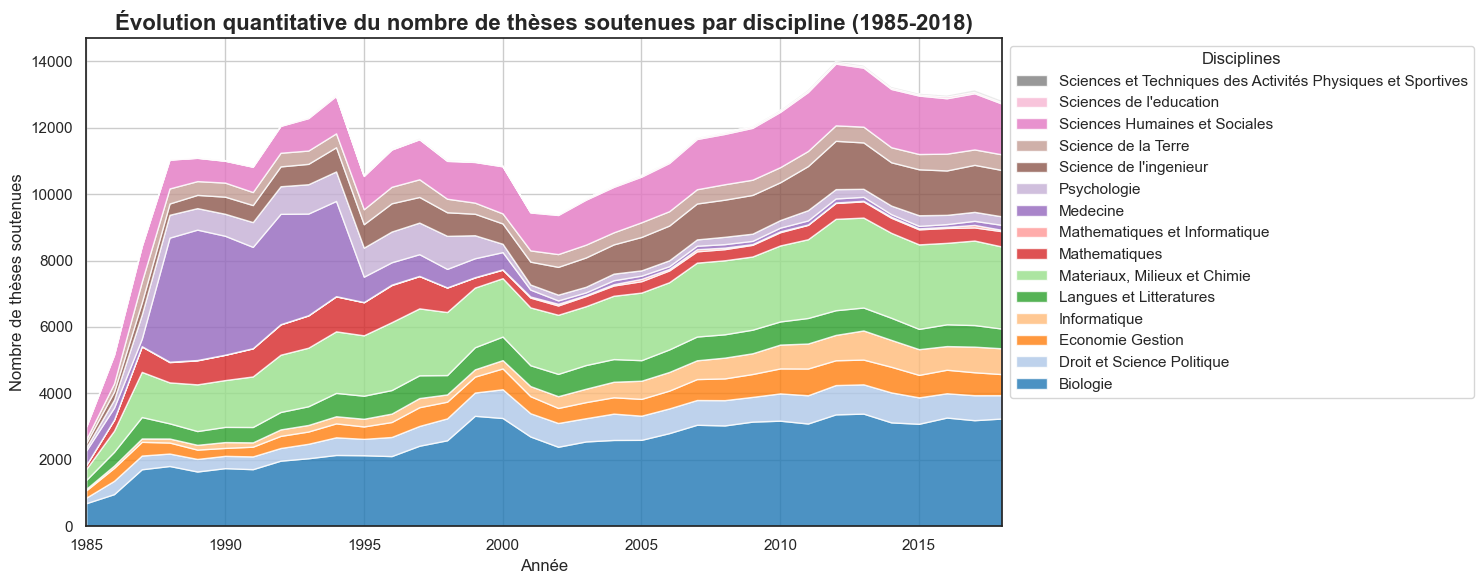

In [49]:
palette = sns.color_palette("tab20", 15)
colors = palette  
plt.figure(figsize=(15, 6))
plt.stackplot(sout_disc_annee1.index, sout_disc_annee1.T, labels=sout_disc_annee1.columns, alpha=0.8, colors=palette)
plt.xlim(1985, 2018)
plt.grid(True)

# Modification de l'ordre des disciplines dans la légende sans changer l'ordre des couleurs , attention à bien fixer les couleurs pour ne pas biaiser le graphique
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1), title="Disciplines")

plt.title("Évolution quantitative du nombre de thèses soutenues par discipline (1985-2018)", fontsize=16, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Nombre de thèses soutenues")
plt.tight_layout()
plt.show()


In [50]:
sout_disc_annee

Année                                         Discipline  \
0     1985                                           Biologie   
1     1985                         Droit et Science Politique   
2     1985                                   Economie Gestion   
3     1985                                       Informatique   
4     1985                            Langues et Litteratures   
..     ...                                                ...   
500   2018                             Science de l'ingenieur   
501   2018                                Science de la Terre   
502   2018                      Sciences Humaines et Sociales   
503   2018                            Sciences de l'education   
504   2018  Sciences et Techniques des Activités Physiques...   

     Nombre de Soutenances  
0                      695  
1                      168  
2                      220  
3                       45  
4                      268  
..                     ...  
500                   1396  
501                    471  
502                   1525  
503                     45  
504                     39  

[505 rows x 3 columns]

## Exercice 9:

In [51]:
sout_disc_annee['Discipline'].unique()

array(['Biologie', 'Droit et Science Politique', 'Economie Gestion',
       'Informatique', 'Langues et Litteratures',
       'Materiaux, Milieux et Chimie', 'Mathematiques',
       'Mathematiques et Informatique', 'Medecine', 'Psychologie',
       "Science de l'ingenieur", 'Science de la Terre',
       'Sciences Humaines et Sociales', "Sciences de l'education",
       'Sciences et Techniques des Activités Physiques et Sportives'],
      dtype=object)

In [52]:
fig = px.bar(
    sout_disc_annee,
    x='Discipline',
    y='Nombre de Soutenances',
    color='Discipline',
    animation_frame='Année',
    title="Nombre de thèses soutenues par discipline et année",
    labels={"Discipline": "Disciplines", "Nombre de Soutenances": "Nombre de thèses soutenues"},
    category_orders={"Année": sorted(sout_disc_annee['Année'].unique())}  # Trier les années
)

# Mise à jour de la mise en page
fig.update_layout(
    title={
        'text': "Nombre de thèses soutenues par discipline et année (1985-2018)",
        'x': 0.5,
        'xanchor': 'center',
        'y': 0.95,
        'yanchor': 'top'
    },
    xaxis_title="Disciplines",
    yaxis_title="Nombre de thèses soutenues",
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[
            dict(label='Play', method='animate', args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]),
            dict(label='Pause', method='animate', args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}])
        ]
    )],
    showlegend=True,
    legend=dict(
        title="Discipline",
        x=1.05,  # Décalage de la légende à droite
        xanchor='left',
        y=1,
        yanchor='top',
        font=dict(size=10),  # Réduction de la taille de la police de la légende
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='Black',
        borderwidth=1
    ),
    margin=dict(l=50, r=150, t=50, b=200),  # Ajustement des marges pour équilibrer l'espace
    width=1000,  # Réduction de la largeur
    height=600,  # Réduction de la hauteur
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=8),
    ),
    sliders=[
        dict(
            active=0,
            x=0.1,
            len=0.9,
            pad=dict(t=100) 
        )
    ]
)

fig.write_html("nombre_de_theses_soutenues_par_discipline_et_annee(1985-2018).html")

fig.show()


In [53]:
# les facultés ont été rajouté pour ameliorer notre selector.
facultes = {
    "Sciences et Technologies": [
        'Biologie', 'Informatique', 'Mathematiques', 'Mathematiques et Informatique', 'Materiaux, Milieux et Chimie', 'Science de l\'ingenieur', 'Science de la Terre'
    ],
    "Droit et Sciences Sociales": [
        'Droit et Science Politique', 'Sciences Humaines et Sociales', 'Sciences de l\'education'
    ],
    "Sciences de la Santé": [
        'Medecine', 'Psychologie'
    ],
    "Sciences Économiques et Gestion": [
        'Economie Gestion'
    ],
    "Lettres et Langues": [
        'Langues et Litteratures'
    ],
    "Sports et Activités Physiques": [
        'Sciences et Techniques des Activités Physiques et Sportives'
    ]
}

# linker faculté et matiere
discipline_to_faculty = {}
for faculté, disciplines in facultes.items():
    for discipline in disciplines:
        discipline_to_faculty[discipline] = faculté

# Ajouter la colonne 'Faculté' au DataFrame
sout_disc_annee['Faculté'] = sout_disc_annee['Discipline'].map(discipline_to_faculty)

# Afficher le DataFrame mis à jour
sout_disc_annee.head()


Année                  Discipline  Nombre de Soutenances  \
0   1985                    Biologie                    695   
1   1985  Droit et Science Politique                    168   
2   1985            Economie Gestion                    220   
3   1985                Informatique                     45   
4   1985     Langues et Litteratures                    268   

                           Faculté  
0         Sciences et Technologies  
1       Droit et Sciences Sociales  
2  Sciences Économiques et Gestion  
3         Sciences et Technologies  
4               Lettres et Langues

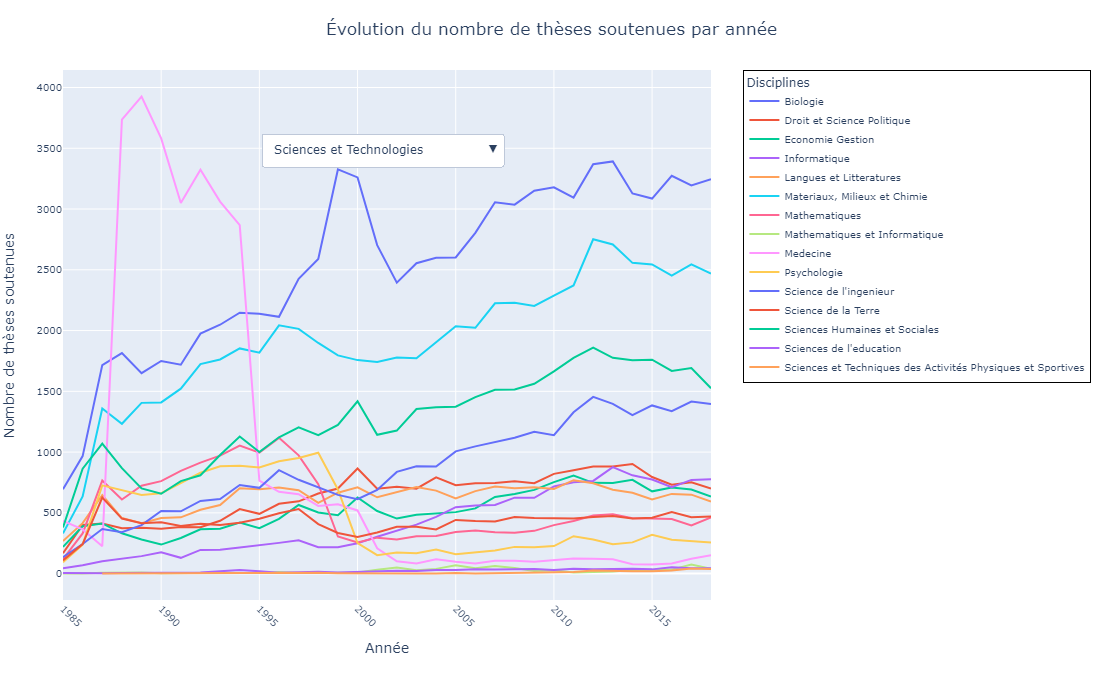

In [54]:
import plotly.express as px

# Création du graphique linéaire avec Plotly
fig = px.line(
    sout_disc_annee,
    x="Année",
    y="Nombre de Soutenances",
    color="Discipline",
    title="Évolution du nombre de thèses soutenues par année",
    labels={"Année": "Année", "Nombre de Soutenances": "Nombre de thèses soutenues"},
    category_orders={"Année": sorted(sout_disc_annee["Année"].unique())},  # Tri des années
)

# Ajout de menus déroulants pour filtrer les disciplines par faculté
faculties = sout_disc_annee["Faculté"].unique()
buttons = []

# Création des boutons pour chaque faculté
for faculté in faculties:
    buttons.append(
        dict(
            label=faculté,
            method="update",
            args=[
                {"visible": [faculté == row_faculté for row_faculté in sout_disc_annee["Faculté"]]},
                {
                    "title": f"Évolution du nombre de thèses soutenues par année ({faculté})",
                },
            ],
        )
    )

# Ajout d'un bouton pour afficher toutes les disciplines
buttons.append(
    dict(
        label="Toutes les disciplines",
        method="update",
        args=[
            {"visible": [True] * len(sout_disc_annee)},  # Tout afficher
            {"title": "Évolution du nombre de thèses soutenues par année (Toutes les disciplines)"},
        ],
    )
)

# Mise à jour de la mise en page
fig.update_layout(
    title={
        "text": "Évolution du nombre de thèses soutenues par année",
        "x": 0.5,
        "xanchor": "center",
    },
    xaxis_title="Année",
    yaxis_title="Nombre de thèses soutenues",
    updatemenus=[
        dict(
            type="dropdown",
            showactive=True,
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            x=0.5,  # Centrer le menu
            xanchor="center",
            y=0.9,  # Positionner le menu sous le titre
            yanchor="top",
        )
    ],
    showlegend=True,
    legend=dict(
        title="Disciplines",
        x=1.05,
        xanchor="left",
        y=1,
        yanchor="top",
        bgcolor="rgba(255, 255, 255, 0.7)",
        bordercolor="Black",
        borderwidth=1,
        font={"size": 10},
    ),
    margin=dict(l=50, r=150, t=70, b=100),
    width=1000,
    height=700,
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=10),
    ),
    yaxis=dict(
        tickfont=dict(size=10),
    ),
)

# Exportation 
fig.write_html("evolution_du_nombre_de_theses_soutenues_avec_selector_facultes.html")

# Affichage du graphique
fig.show()
